In [14]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('rt_reviews.csv',encoding='ISO-8859–1')
data

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...
...,...,...
479995,rotten,Zemeckis seems unable to admit that the motio...
479996,fresh,Movies like The Kids Are All Right -- beautif...
479997,rotten,Film-savvy audiences soon will catch onto Win...
479998,fresh,An odd yet enjoyable film.


In [3]:
len(data)

480000

In [4]:
#shape of data
data.shape

(480000, 2)

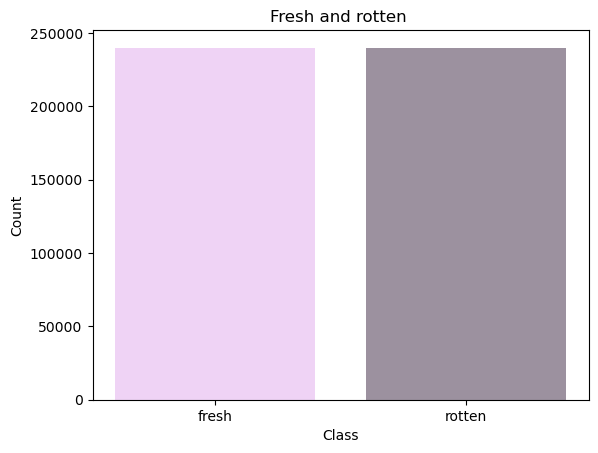

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# the number of occurrences of each class
class_counts = data['Freshness'].value_counts()

# Create the bar graph
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts.values,color=['#EFD3F5', '#9C919F'])

# Set the title and axis labels
ax.set_title('Fresh and rotten ')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Display the graph
plt.show()


In [6]:
#remove duplicate rows from data set
data=data.drop_duplicates()

In [7]:
#length of data set after deleting duplicated rows
len(data)

339716

In [8]:
data.shape

(339716, 2)

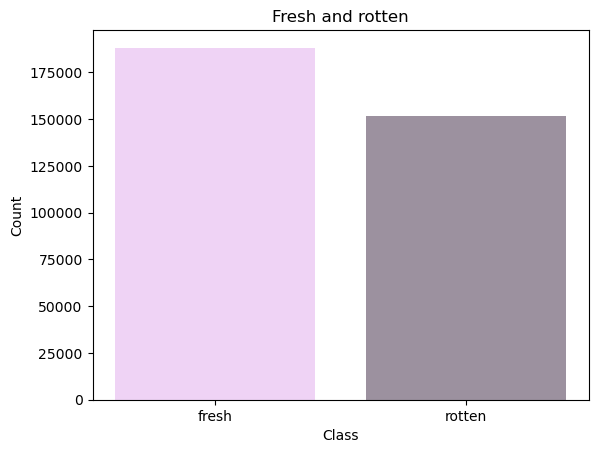

In [164]:
#bar graph after deleting duplicate rows
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of occurrences of each class
class_counts = data['Freshness'].value_counts()

# Create the bar graph
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts.values,color=['#EFD3F5', '#9C919F'])

# Set the title and axis labels
ax.set_title('Fresh and rotten')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Display the graph
plt.show()

In [9]:
data.head()

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...


In [10]:
data.columns

Index(['Freshness', 'Review'], dtype='object')

In [11]:
data.isnull().sum()

Freshness    0
Review       1
dtype: int64

In [16]:
#removing special charecters and chaning words into lower case
import re
data['Review'] = data['Review'].apply(lambda Re: str(Re).replace("-"," "))
data['Review'] = data['Review'].apply(lambda Re: re.sub(r'[^a-zA-Z\s]', '', Re))
data['Review'] = data['Review'].str.lower()
data['Review']

C:\Users\harsh\AppData\Local\Temp\ipykernel_24880\2675036435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda Re: str(Re).replace("-"," "))
C:\Users\harsh\AppData\Local\Temp\ipykernel_24880\2675036435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda Re: re.sub(r'[^a-zA-Z\s]', '', Re))
C:\Users\harsh\AppData\Local\Temp\ipykernel_24880\2675036435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

0          manakamana doesnt answer any questions yet ma...
1          wilfully offensive and powered by a chest thu...
2          it would be difficult to imagine material mor...
3          despite the gusto its star brings to the role...
4          if there was a good idea at the core of this ...
                                ...                        
479994     roland joffes deeply ridiculous movie is caug...
479996     movies like the kids are all right    beautif...
479997     film savvy audiences soon will catch onto win...
479998                           an odd yet enjoyable film 
479999     no other animation studio even our beloved pi...
Name: Review, Length: 339716, dtype: object

In [17]:
# Decide on the proportions of your data
train_size = 0.7
dev_test_size = 0.3

# Split your data into the training set and the rest of the data
train_data, remaining_data = train_test_split(data, train_size=train_size, random_state=42)

# Split the remaining data into the development set and the test set
dev_data, test_data = train_test_split(remaining_data, train_size=dev_test_size/(dev_test_size+dev_test_size), random_state=42)

# Print the sizes of each set
print(f"Training set size: {len(train_data)}")
print(f"Development set size: {len(dev_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 237801
Development set size: 50957
Test set size: 50958


In [18]:
train_df=train_data.copy()

In [19]:
train_df_Review=train_df.Review.tolist()
train_df_Freshness=train_df.Freshness.tolist()

In [20]:
# Create a dictionary to store the frequency of each word for each class
class_word_counts = dict()
class_word_counts['fresh']={}
class_word_counts['rotten']={}
print(class_word_counts)
# Get the total number of reviews in each class
class_count = {}
class_count['fresh']=0.0
class_count['rotten']=0.0
class_count

{'fresh': {}, 'rotten': {}}


{'fresh': 0.0, 'rotten': 0.0}

In [21]:
#creat a set to add words
vocabulary=set()

In [22]:
for i in range(len(train_df_Review)):
    sentence = train_df_Review[i]
    sentence_words = sentence.split()
    class_name = train_df_Freshness[i] 
    if class_name == "fresh":
        for word in sentence_words:
            if word in class_word_counts["fresh"]:
                class_word_counts["fresh"][word] += 1
            else:
                class_word_counts["fresh"][word] = 1
            vocabulary.add(word)  #adding word to vocabulary
    if class_name == "rotten":
        for word in sentence_words:
            if word in class_word_counts["rotten"]:
                class_word_counts["rotten"][word] += 1
            else:
                class_word_counts["rotten"][word] = 1
            vocabulary.add(word)
    class_count[class_name]+=1


In [23]:
class_count

{'fresh': 131979.0, 'rotten': 105822.0}

In [24]:
vocabulary

{'unaided',
 'dashboards',
 'hpbj',
 'mackenzie',
 'intentioned',
 'greases',
 'kinderkultur',
 'nikolaj',
 'deepthink',
 'eskil',
 'howitts',
 'hardens',
 'formal',
 'rinzlers',
 'refilmagem',
 'dans',
 'hudsonkatherine',
 'admire',
 'sportscenter',
 'polaroids',
 'reif',
 'versions',
 'smuel',
 'anguish',
 'machinations',
 'twistings',
 'untraveled',
 'clutch',
 'impishness',
 'observer',
 'physicists',
 'comcasts',
 'messagesbut',
 'whallop',
 'distressingly',
 'fale',
 'shakycams',
 'tribespeople',
 'alienate',
 'impetuous',
 'shambly',
 'smoulder',
 'jg',
 'unrelievedly',
 'doppler',
 'munsons',
 'expectingand',
 'grashaw',
 'soundscape',
 'sidney',
 'csokas',
 'existenceof',
 'antin',
 'steals',
 'underarticulated',
 'craggy',
 'baileys',
 'megadeth',
 'ash',
 'incorrectness',
 'fanswho',
 'lowish',
 'stewpot',
 'gummy',
 'courtisane',
 'congratulatory',
 'princbaby',
 'hmmmmight',
 'swarms',
 'bergmanian',
 'camps',
 'gdp',
 'napalms',
 'clobberin',
 'moscows',
 'ansiedad',
 'hi

In [25]:
class_word_counts

{'fresh': {'marked': 81,
  'by': 11033,
  'a': 109093,
  'tossed': 30,
  'off': 2281,
  'feeling': 760,
  'distinct': 85,
  'impression': 155,
  'that': 34330,
  'americas': 175,
  'most': 6947,
  'viable': 17,
  'auteur': 91,
  'brats': 6,
  'had': 1359,
  'taken': 440,
  'an': 19259,
  'unfamiliar': 69,
  'path': 195,
  'with': 26689,
  'minimal': 52,
  'investment': 59,
  'for': 22086,
  'uncertain': 47,
  'gain': 52,
  'all': 9273,
  'the': 151903,
  'classic': 1360,
  'moments': 1956,
  'are': 9764,
  'there': 3848,
  'crammed': 50,
  'in': 44853,
  'as': 25987,
  'if': 7346,
  'we': 3889,
  'might': 2258,
  'not': 11430,
  'get': 2539,
  'another': 1762,
  'shot': 957,
  'at': 10780,
  'this': 21794,
  'its': 36544,
  'very': 3901,
  'sweet': 1102,
  'and': 98971,
  'charming': 869,
  'should': 2102,
  'be': 13143,
  'thankful': 23,
  'isnt': 2152,
  'childhood': 216,
  'ruining': 8,
  'disaster': 222,
  'mulholland': 12,
  'drive': 222,
  'is': 55220,
  'maddeningly': 25,
  'abs

In [26]:
total_words_in_class = sum(class_word_counts['fresh'].values())+sum(class_word_counts['rotten'].values())
total_words_in_class

5249869

In [27]:
#creat conditional probability
cond_prob={}
cond_prob['fresh']={}
cond_prob['rotten']={}

In [28]:
total_fresh_counts=sum(class_word_counts['fresh'].values())
total_word_counts=sum(class_word_counts['rotten'].values())
print(total_fresh_counts)
print(total_word_counts)

2938168
2311701


In [29]:
#conditional probability
for word in vocabulary:
    if word in class_word_counts['fresh']:
        word_count = class_word_counts['fresh'][word]
        cond_prob['fresh'][word] = (word_count+0.001) / total_fresh_counts
    if word in class_word_counts['rotten']:
        word_count = class_word_counts['rotten'][word]
        cond_prob['rotten'][word] = (word_count+0.001) / total_word_counts

In [30]:
prior_probab_fresh=class_count['fresh']/len(train_df_Review)
prior_probab_rotten=class_count['rotten']/len(train_df_Review)
print(prior_probab_fresh)
print(prior_probab_rotten)

0.5549976661157859
0.4450023338842141


In [31]:
#development dataset
dev_data_Review=dev_data.Review.tolist()
dev_data_Freshness=dev_data.Freshness.tolist()

In [32]:
#conditional probability 

new_dev_Freshness=[]
for i in dev_data_Review:
    words = i.split()
    # Initialize conditional probabilities
    positive_prob = 0.000000000000000001       #smoothing
    negative_prob = 0.000000000000000001
    #print(words)
    # Calculate conditional probabilities for each word in the sentence
    for word in words:
    #    # Check if word is in positive word dictionary
        if word in cond_prob['fresh']:
            positive_prob *= float(cond_prob['fresh'][word])
    #    # Check if word is in negative word dictionary
        if word in cond_prob['rotten']:
            negative_prob *= float(cond_prob['rotten'][word])

    
    if positive_prob>negative_prob:
        new_dev_Freshness.append('fresh')
    else:
        new_dev_Freshness.append('rotten')

In [33]:
accu_count=float(0)
for i in range(len(new_dev_Freshness)):
    if new_dev_Freshness[i]==dev_data_Freshness[i]:
        #print(l[i])
        accu_count=accu_count+1
accuracy=accu_count/len(dev_data_Freshness)
print("Accuracy of dev dataset using conditional probability:")
accuracy

Accuracy of dev dataset using conditional probability:


0.7184685126675432

In [34]:
#probability of occurance of the in sentence
prob=class_word_counts['fresh']['the']+class_word_counts['rotten']['the']
total=sum(class_word_counts['fresh'].values())+sum(class_word_counts['rotten'].values())
print(prob/total)

0.051902818908433714


In [35]:
#p['the'|'Positive]
print("fresh:",cond_prob['fresh']['the'])
print('rotten:',cond_prob['rotten']['the'])

fresh: 0.05169990313692069
rotten: 0.052160725370625355


In [55]:
pronouns = {'i', 'me', 'you', 'he', 'him', 'she', 'her', 'it', 'we', 'us', 'they', 'them', 'mine', 'yours', 'his', 'hers', 'its', 'ours', 'theirs', 'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves', 'this', 'that', 'these', 'those', 'who', 'whom', 'whose', 'which', 'what', 'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were', 'will', 'with'}
pronouns=list(pronouns)
print(pronouns)

['are', 'theirs', 'that', 'is', 'which', 'me', 'his', 'were', 'her', 'he', 'at', 'itself', 'you', 'yourselves', 'these', 'by', 'it', 'ourselves', 'who', 'on', 'i', 'she', 'they', 'and', 'be', 'whom', 'this', 'herself', 'a', 'what', 'as', 'to', 'whose', 'for', 'them', 'yours', 'was', 'hers', 'myself', 'yourself', 'himself', 'an', 'those', 'with', 'in', 'the', 'will', 'mine', 'ours', 'of', 'from', 'him', 'themselves', 'us', 'we', 'its', 'has']


In [37]:
#creat new vocabulary,class word counts,conditional probability to delete pronoun values from them
vocabulary1=vocabulary.copy()
class_word_counts1=class_word_counts
cond_prob1=cond_prob

In [38]:
for x in pronouns:
    if x in vocabulary1:
        vocabulary1.remove(x)
vocabulary1=sorted(vocabulary1)

In [39]:
for x in pronouns:
    if x in class_word_counts1['fresh']:
        del class_word_counts1['fresh'][x]
    if x in class_word_counts1['rotten']:
        del class_word_counts1['rotten'][x]

In [40]:
for x in pronouns:
    if x in cond_prob1['fresh']:
        del cond_prob1['fresh'][x]
    if x in cond_prob1['rotten']:
        del cond_prob1['rotten'][x]

In [41]:
#conditional probability 

new_dev_Freshness=[]
for i in dev_data_Review:
    words = i.split()
    # Initialize conditional probabilities
    positive_prob = 0.000000000000000001        #smoothing
    negative_prob = 0.000000000000000001
    #print(words)
    # Calculate conditional probabilities for each word in the sentence
    for word in words:
    #    # Check if word is in positive word dictionary
        if word in cond_prob1['fresh']:
            positive_prob *= float(cond_prob1['fresh'][word])
    #    # Check if word is in negative word dictionary
        if word in cond_prob1['rotten']:
            negative_prob *= float(cond_prob1['rotten'][word])

    
    if positive_prob>negative_prob:
        new_dev_Freshness.append('fresh')
    else:
        new_dev_Freshness.append('rotten')

In [42]:
#after removing pronoun words
accu_count=float(0)
for i in range(len(new_dev_Freshness)):
    if new_dev_Freshness[i]==dev_data_Freshness[i]:
        #print(l[i])
        accu_count=accu_count+1
accuracy=accu_count/len(dev_data_Freshness)
print("Accuracy of dev dataset using conditional probability:")
accuracy

Accuracy of dev dataset using conditional probability:


0.7160939615754459

In [43]:
test_data

,Freshness,Review
104419,rotten,sofia coppolas lost in translation was such ...
121937,rotten,the raven however is very serious and the dis...
280266,fresh,the best horror films have always reflected t...
228692,fresh,a big fat value meal stuffed with profane rav...
189229,fresh,as a fragmentary middle piece of something it...
...,...,...
360468,rotten,the problem with revolver is that it is ritch...
352358,rotten,long winded ponderous and without much in the...
335105,fresh,watching ra dickey become one of the biggest ...
441188,rotten,the film has no shape or narrative force it m...


In [44]:
test_data_Review=test_data.Review.tolist()
test_data_Freshness=test_data.Freshness.tolist()

In [45]:
#conditional probability 

new_test_Freshness=[]
for i in test_data_Review:
    words = i.split()
    # Initialize conditional probabilities
    positive_prob = 0.000000000000000001     #smoothing
    negative_prob = 0.000000000000000001
    #print(words)
    # Calculate conditional probabilities for each word in the sentence
    for word in words:
    #    # Check if word is in positive word dictionary
        if word in cond_prob['fresh']:
            positive_prob *= float(cond_prob['fresh'][word])
    #    # Check if word is in negative word dictionary
        if word in cond_prob['rotten']:
            negative_prob *= float(cond_prob['rotten'][word])

    
    if positive_prob<negative_prob:
        new_test_Freshness.append('rotten')
    else:
        new_test_Freshness.append('fresh')

In [46]:
accu_count=float(0)
for i in range(len(new_test_Freshness)):
    if new_test_Freshness[i]==test_data_Freshness[i]:
        #print(l[i])
        accu_count=accu_count+1
accuracy=accu_count/len(test_data_Freshness)
print("Accuracy of test dataset using conditional probability:")
accuracy

Accuracy of test dataset using conditional probability:


0.7157659248793123

In [47]:
#prediction of test dataset using naive base theorem
#Navies bayies theorem
new_test_Freshness1=[]
for i in test_data_Review:
    words = i.split()
    # Initialize conditional probabilities
    positive_prob = 0.000000000000000001     #smoothing
    negative_prob = 0.000000000000000001
    #print(words)
    # Calculate conditional probabilities for each word in the sentence
    for word in words:
    #    # Check if word is in positive word dictionary
        if word in cond_prob['fresh']:
            positive_prob *= float(cond_prob['fresh'][word])
    #    # Check if word is in negative word dictionary
        if word in cond_prob['rotten']:
            negative_prob *= float(cond_prob['rotten'][word])
    #    # If word is not in either dictionary, ignore it
    # Normalize probabilities
    prob_sentenc = positive_prob * prior_probab_fresh + negative_prob * prior_probab_rotten
    Navie_positive_prob = positive_prob * prior_probab_fresh / prob_sentenc   
    Navie_negative_prob = negative_prob * prior_probab_rotten / prob_sentenc    
    
    if Navie_positive_prob>Navie_negative_prob:
        new_test_Freshness1.append('fresh')
    else:
        new_test_Freshness1.append('rotten')

In [48]:
accu_count=float(0)
for i in range(len(new_test_Freshness1)):
    if new_test_Freshness1[i]==test_data_Freshness[i]:
        #print(l[i])
        accu_count=accu_count+1
accuracy=accu_count/len(test_data_Freshness)
print("Accuracy of test dataset using Naive Bayes theorem:")
accuracy

Accuracy of test dataset using Naive Bayes theorem:


0.7172377251854468

In [49]:
#create probability dictionary for naive bayes theorem probability
probability={}
probability['fresh']={}
probability['rotten']={}
probability

{'fresh': {}, 'rotten': {}}

In [50]:
for i in train_df_Review:
    words = i.split() 
    positive_prob=0.000000000000000001 #smoothing in case word not in conditional probability
    negative_prob=0.000000000000000001
    for word in words:
        if word in cond_prob['fresh']:
            positive_prob+= cond_prob['fresh'][word]
        if word in cond_prob['rotten']:
            negative_prob+= cond_prob['rotten'][word]
            
        prob_sentenc = positive_prob * prior_probab_fresh + negative_prob * prior_probab_rotten
        Navie_positive_prob = positive_prob * prior_probab_fresh / prob_sentenc   
        Navie_negative_prob = negative_prob * prior_probab_rotten / prob_sentenc
        probability['fresh'][word] = Navie_positive_prob
        probability['rotten'][word] = Navie_negative_prob

In [51]:
probability['fresh'] 

{'bendingers': 0.5833156892940583,
 'film': 0.5955593771872225,
 'is': 0.5560055306914136,
 'a': 0.5549976661157859,
 'mess': 0.1840665148510517,
 'thats': 0.5196191506577378,
 'really': 0.4535708679928346,
 'all': 0.5065117034771176,
 'there': 0.5231693548883931,
 'to': 0.5316613614856638,
 'it': 0.5788754218362174,
 'marked': 0.5248535992887666,
 'by': 0.5117498036552036,
 'tossed': 0.5704453095617021,
 'off': 0.48420241657634655,
 'feeling': 0.456534639599976,
 'distinct': 0.5948836437219106,
 'impression': 0.5940545235533414,
 'that': 0.5465417228661428,
 'americas': 0.7223610462338631,
 'most': 0.6616456815876458,
 'viable': 0.5415898054741641,
 'auteur': 0.5735815204119108,
 'brats': 0.5283809628439745,
 'had': 0.5014556818724999,
 'taken': 0.5569577155221914,
 'an': 0.4633729123099568,
 'unfamiliar': 0.5476613419728029,
 'path': 0.5100064832034656,
 'with': 0.47066369378237344,
 'minimal': 0.5334250969769686,
 'investment': 0.5182131274184163,
 'for': 0.5836609623081563,
 'uncer

In [52]:
probability['rotten'] 

{'bendingers': 0.41668431070594164,
 'film': 0.40444062281277743,
 'is': 0.4439944693085865,
 'a': 0.4450023338842141,
 'mess': 0.8159334851489483,
 'thats': 0.48038084934226216,
 'really': 0.5464291320071654,
 'all': 0.49348829652288234,
 'there': 0.4768306451116068,
 'to': 0.4683386385143362,
 'it': 0.4211245781637825,
 'marked': 0.4751464007112334,
 'by': 0.4882501963447964,
 'tossed': 0.42955469043829797,
 'off': 0.5157975834236534,
 'feeling': 0.5434653604000241,
 'distinct': 0.4051163562780895,
 'impression': 0.4059454764466585,
 'that': 0.4534582771338573,
 'americas': 0.27763895376613695,
 'most': 0.33835431841235425,
 'viable': 0.4584101945258358,
 'auteur': 0.4264184795880892,
 'brats': 0.4716190371560255,
 'had': 0.49854431812750016,
 'taken': 0.4430422844778085,
 'an': 0.5366270876900431,
 'unfamiliar': 0.45233865802719714,
 'path': 0.4899935167965343,
 'with': 0.5293363062176266,
 'minimal': 0.46657490302303145,
 'investment': 0.4817868725815837,
 'for': 0.4163390376918437

In [53]:
fresh_prob=probability['fresh']
rotten_prob=probability['rotten']

# sort the dictionary items by their values in descending order
sorted_items_fresh = sorted(fresh_prob.items(), key=lambda x: x[1], reverse=True)

# get the top 10 items
top_10_fresh = sorted_items_fresh[:10]

# sort the dictionary items by their values in descending order
sorted_items_rotten = sorted(rotten_prob.items(), key=lambda x: x[1], reverse=True)

# get the top 10 items
top_10_rotten = sorted_items_rotten[:10]
top_fresh=[]
for key in top_10_fresh:
        top_fresh.append(key[0])

top_rotten=[]
for key in top_10_rotten:
        top_rotten.append(key[0])
top_fresh
# print the top 10 items for fresh class after removing pronouns
print("top 10 words for class fresh")
print(top_fresh)
# print the top 10 items for rotten class after removing pronouns
print("top 10 words for class rotten")
print(top_rotten)

top 10 words for class fresh
['reassures', 'hirokazu', 'zvyagintsev', 'evenhanded', 'belleville', 'farocki', 'akhavans', 'koreedas', 'akermans', 'ades']
top 10 words for class rotten
['charmless', 'dallying', 'laughless', 'spritzing', 'kada', 'amateurishly', 'meretricious', 'convolutedin', 'primjera', 'rijetkih']
